In [ ]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import signal

**Señal ECG sin ruido =============================================================================**

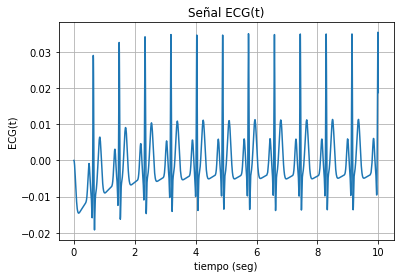

In [ ]:
#Grafica Señal EGC
t = pd.read_csv('t.txt',sep=',',header=None)
t = t.values.tolist()[0]
xt = pd.read_csv('Señal.txt',sep=',',header=None)
xt = xt.values.tolist()[0]
plt.plot(t,xt)
plt.title("Señal ECG(t)")
plt.xlabel('tiempo (seg)')
plt.ylabel('ECG(t)')
plt.grid()
plt.savefig("ecg.pdf")
plt.show()

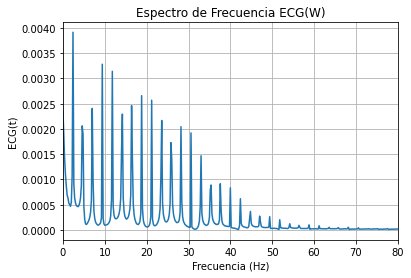

In [ ]:
#Espectro
Fs=1000
T=1/Fs
L=len(t)
XW=np.fft.fft(xt)/L
XW=np.fft.fftshift(XW)
frq=np.arange(-L/2,L/2,1) * (Fs/L)
plt.plot(frq, 2*abs(XW))
plt.title("Espectro de Frecuencia ECG(W)")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('ECG(t)')
plt.xlim(0,80)
plt.grid()
plt.savefig("espec.pdf")
plt.show()

**Señal ECG con ruido seonidal =============================================================================**

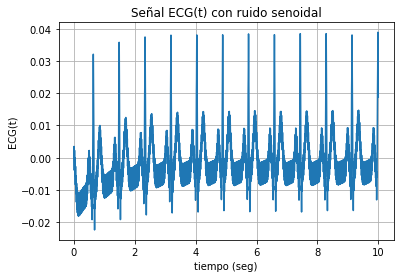

In [ ]:
#Señal ECG con ruido senoidal
t2 = [i * (2*np.pi*60) for i in t]
rs= 0.1*max(xt)*np.sin(t2)
xt2=xt+rs
plt.plot(t,xt2)
plt.title("Señal ECG(t) con ruido senoidal")
plt.xlabel('tiempo (seg)')
plt.ylabel('ECG(t)')
plt.grid()
plt.savefig("ecg1.pdf")
plt.show()

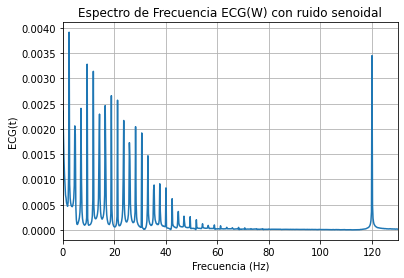

In [ ]:
#Espectro ECG con ruido senoidal
Fs=1000
T=1/Fs
L=len(t)
XW=np.fft.fft(xt2)/L
XW=np.fft.fftshift(XW)
frq=np.arange(-L/2,L/2,1) * (Fs/L)
plt.plot(frq, 2*abs(XW))
plt.title("Espectro de Frecuencia ECG(W) con ruido senoidal")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('ECG(t)')
plt.xlim(0,130)
plt.grid()
plt.savefig("espec1.pdf")
plt.show()

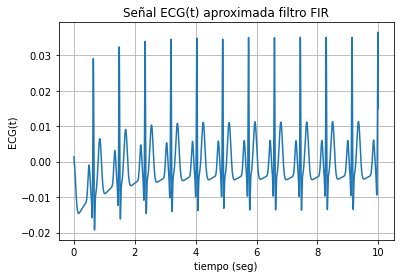

In [ ]:
#Filtro FIR
fc=100
wn=fc/(Fs/2)
N=100
h = scipy.signal.firwin(N,wn, window = "hamming", pass_zero = 'lowpass')
y=np.convolve(xt2,h,'same')
plt.plot(t, y)
plt.title("Señal ECG(t) aproximada filtro FIR")
plt.xlabel('tiempo (seg)')
plt.ylabel('ECG(t)')
plt.grid()
plt.savefig("ecgFIR1.pdf")
plt.show()

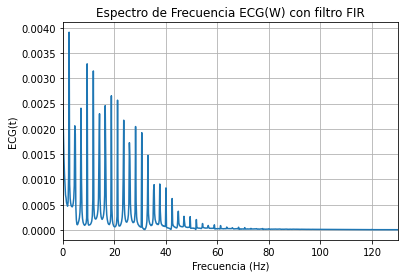

In [ ]:
#Espectro
L=len(t)
XW=np.fft.fft(y)/L
XW=np.fft.fftshift(XW)
frq=np.arange(-L/2,L/2,1) * (Fs/L)
plt.plot(frq, 2*abs(XW))
plt.title("Espectro de Frecuencia ECG(W) con filtro FIR")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('ECG(t)')
plt.xlim(0,130)
plt.grid()
plt.savefig("especFIR1.pdf")
plt.show()

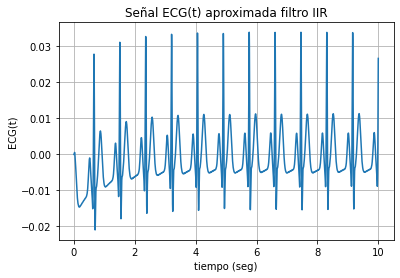

In [ ]:
#Filtro IIR
fc=50
wn=fc/(Fs/2)
N=5
[b,a]=scipy.signal.butter(N,wn,'low')
y=scipy.signal.lfilter(b,a,xt2)
plt.plot(t, y)
plt.title("Señal ECG(t) aproximada filtro IIR")
plt.xlabel('tiempo (seg)')
plt.ylabel('ECG(t)')
plt.grid()
plt.savefig("ecgIIR1.pdf")
plt.show()

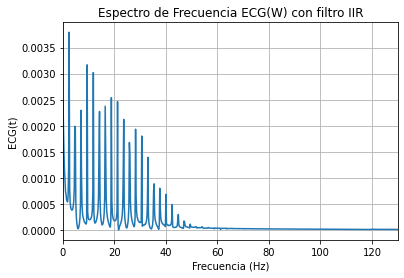

In [ ]:
#Espectro
L=len(t)
XW=np.fft.fft(y)/L
XW=np.fft.fftshift(XW)
frq=np.arange(-L/2,L/2,1) * (Fs/L)
plt.plot(frq, 2*abs(XW))
plt.title("Espectro de Frecuencia ECG(W) con filtro IIR")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('ECG(t)')
plt.xlim(0,130)
plt.grid()
plt.savefig("especIIR1.pdf")
plt.show()

**Señal ECG con ruido aleatorio =============================================================================**

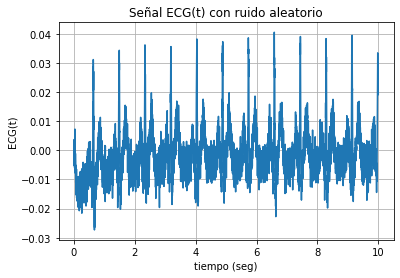

In [ ]:
#Señal ECG con ruido aleatorio
rs= 0.1*max(xt)*np.random.normal(0,1,len(t))
xt2=xt+rs
plt.plot(t,xt2)
plt.title("Señal ECG(t) con ruido aleatorio")
plt.xlabel('tiempo (seg)')
plt.ylabel('ECG(t)')
plt.grid()
plt.savefig("ecg2.pdf")
plt.show()

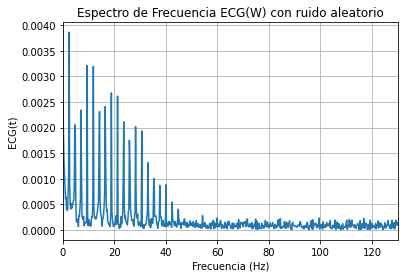

In [ ]:
#Espectro ECG con ruido aleatorio
Fs=1000
T=1/Fs
L=len(t)
XW=np.fft.fft(xt2)/L
XW=np.fft.fftshift(XW)
frq=np.arange(-L/2,L/2,1) * (Fs/L)
plt.plot(frq, 2*abs(XW))
plt.title("Espectro de Frecuencia ECG(W) con ruido aleatorio")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('ECG(t)')
plt.xlim(0,130)
plt.grid()
plt.savefig("espec2.pdf")
plt.show()

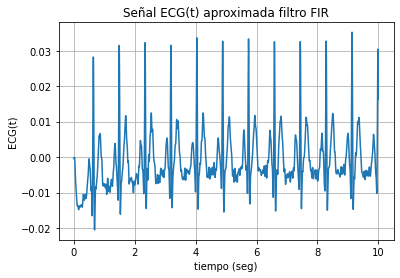

In [ ]:
#Filtro FIR
fc=50
wn=fc/(Fs/2)
N=100
h = scipy.signal.firwin(N,wn, window = "hamming", pass_zero = 'lowpass')
y=np.convolve(xt2,h,'same')
plt.plot(t, y)
plt.title("Señal ECG(t) aproximada filtro FIR")
plt.xlabel('tiempo (seg)')
plt.ylabel('ECG(t)')
plt.grid()
plt.savefig("ecgFIR2.pdf")
plt.show()

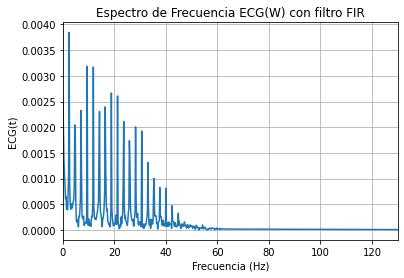

In [ ]:
#Espectro
L=len(t)
XW=np.fft.fft(y)/L
XW=np.fft.fftshift(XW)
frq=np.arange(-L/2,L/2,1) * (Fs/L)
plt.plot(frq, 2*abs(XW))
plt.title("Espectro de Frecuencia ECG(W) con filtro FIR")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('ECG(t)')
plt.xlim(0,130)
plt.grid()
plt.savefig("especFIR2.pdf")
plt.show()

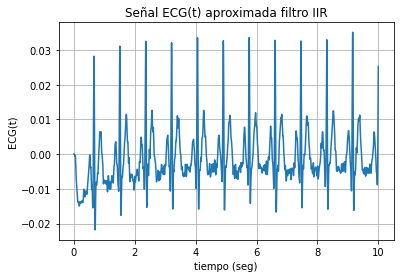

In [ ]:
#Filtro IIR
fc=50
wn=fc/(Fs/2)
N=5
[b,a]=scipy.signal.butter(N,wn,'low')
y=scipy.signal.lfilter(b,a,xt2)
plt.plot(t, y)
plt.title("Señal ECG(t) aproximada filtro IIR")
plt.xlabel('tiempo (seg)')
plt.ylabel('ECG(t)')
plt.grid()
plt.savefig("ecgIIR2.pdf")
plt.show()

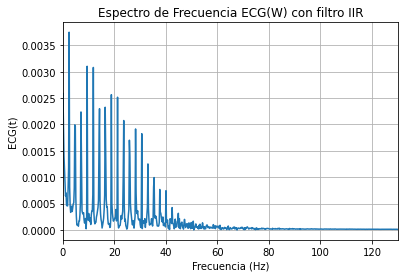

In [ ]:
#Espectro
L=len(t)
XW=np.fft.fft(y)/L
XW=np.fft.fftshift(XW)
frq=np.arange(-L/2,L/2,1) * (Fs/L)
plt.plot(frq, 2*abs(XW))
plt.title("Espectro de Frecuencia ECG(W) con filtro IIR")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('ECG(t)')
plt.xlim(0,130)
plt.grid()
plt.savefig("especIIR2.pdf")
plt.show()